<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Loading-and-Cleaning-Data" data-toc-modified-id="Loading-and-Cleaning-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading and Cleaning Data</a></span></li><li><span><a href="#Graphing-Individual-Species" data-toc-modified-id="Graphing-Individual-Species-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Graphing Individual Species</a></span></li><li><span><a href="#Graphing-On-Single-Chart" data-toc-modified-id="Graphing-On-Single-Chart-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Graphing On Single Chart</a></span></li><li><span><a href="#Hypothesis-Testing" data-toc-modified-id="Hypothesis-Testing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Hypothesis Testing</a></span><ul class="toc-item"><li><span><a href="#KW-Test" data-toc-modified-id="KW-Test-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>KW Test</a></span><ul class="toc-item"><li><span><a href="#Pair-wise-comparison-tests" data-toc-modified-id="Pair-wise-comparison-tests-5.1.1"><span class="toc-item-num">5.1.1&nbsp;&nbsp;</span>Pair-wise comparison tests</a></span></li></ul></li></ul></li><li><span><a href="#MANOVA" data-toc-modified-id="MANOVA-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>MANOVA</a></span></li><li><span><a href="#Non-parametric-MANOVA" data-toc-modified-id="Non-parametric-MANOVA-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Non-parametric MANOVA</a></span><ul class="toc-item"><li><span><a href="#Rank-MANOVA-Pairwise-Comparison" data-toc-modified-id="Rank-MANOVA-Pairwise-Comparison-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Rank-MANOVA Pairwise Comparison</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Introduction

This project examined bat communities in five different habitats located within the Hassayampa River Preserve outside of Wickenburg, AZ within the Sonoran Desert.  Bat commuities were examined utilizing echolocation recordings made on a Wildlife Acoustics Song Meter Mini Bat in May and June of 2020.  The detector was set in each habitat for seven consecutive days during this time period.  Echolocation recordings were analyzed and classified utilizing Wildlife Acoustics Kaleidoscope Pro Software.  The habitats examined were 1. Cottonwood-willow riparian forest along a stream (known as Stream1 and Stream sites), 2. cottonwood-mesquite woodland (known as Cottonwood), 3. mesquite bosque (known as Mesquite), 4. pond shore lined with willow, cottonwood, and mesquite (known as Lake), and 5. willow, palm, mesquite, and cottonwood forest (known as Palm). In the notebook below the data is cleaned, graphed and hypothesis testing carried out.

# Loading and Cleaning Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('HassayampaBatHabitats.csv')

In [4]:
df.head()

,Habitat,Date,ANTPAL,CORTOW,EPTFUS,EUDMAC,EUMPER,EUMUND,LASBLO,LASCIN,...,MYOTHY,MYOVEL,MYOVOL,MYOYUM,NYCFEM,NYCMAC,PARHES,TADBRA,NOID,NOISE
0,Stream,20200522,15.0,NaN,18,NaN,NaN,NaN,NaN,3.0,...,1.0,22.0,14.0,9.0,1.0,NaN,3.0,61,210,127
1,Stream,20200523,13.0,NaN,37,NaN,1.0,NaN,4.0,1.0,...,1.0,7.0,3.0,2.0,1.0,NaN,1.0,11,138,107
2,Stream,20200524,25.0,NaN,39,NaN,NaN,NaN,6.0,NaN,...,NaN,8.0,8.0,11.0,NaN,NaN,5.0,37,222,128
3,Stream,20200525,38.0,NaN,56,NaN,NaN,NaN,3.0,4.0,...,NaN,13.0,3.0,5.0,1.0,NaN,3.0,26,175,93
4,Stream,20200526,39.0,NaN,54,NaN,NaN,NaN,4.0,NaN,...,NaN,8.0,6.0,12.0,NaN,NaN,5.0,15,137,76


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 27 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Habitat  42 non-null     object 
 1   Date     42 non-null     int64  
 2   ANTPAL   38 non-null     float64
 3   CORTOW   13 non-null     float64
 4   EPTFUS   42 non-null     int64  
 5   EUDMAC   0 non-null      float64
 6   EUMPER   1 non-null      float64
 7   EUMUND   9 non-null      float64
 8   LASBLO   39 non-null     float64
 9   LASCIN   39 non-null     float64
 10  LASNOC   40 non-null     float64
 11  LASXAN   41 non-null     float64
 12  MACCAL   0 non-null      float64
 13  MYOCAL   28 non-null     float64
 14  MYOCIL   41 non-null     float64
 15  MYOEVO   23 non-null     float64
 16  MYOOCC   17 non-null     float64
 17  MYOTHY   5 non-null      float64
 18  MYOVEL   39 non-null     float64
 19  MYOVOL   32 non-null     float64
 20  MYOYUM   30 non-null     float64
 21  NYCFEM   38 non-nu

In [6]:
#Remove column with less than 10 nights of detections as well as noise counts
df = df.drop(columns = ['EUDMAC', 'MYOTHY', 'NOISE', 'MACCAL', 'EUMPER', 'EUMUND'])

In [7]:
#Number of nights sampled for each habitat/recording site.
df.Habitat.value_counts()

Mesquite      7
Lake          7
Stream1       7
Cottonwood    7
Palm          7
Stream        7
Name: Habitat, dtype: int64

In [8]:
#Fill all na's with 0
df = df.fillna(0)

In [9]:
#Create column with total number of bat detections
df['Tot_Bat_det'] = df.ANTPAL + df.CORTOW + df.EPTFUS + df.LASBLO + df.LASCIN + df.LASNOC + df.LASXAN + df.MYOCAL + df.MYOCIL + df.MYOEVO + df.MYOOCC + df.MYOVEL + df.MYOVOL +df.MYOYUM + df.NYCFEM + df.NYCMAC + df.PARHES + df.TADBRA + df.NOID

In [10]:
#Create column for total specie detected
df['Total_Species'] = df[['ANTPAL', 'CORTOW', 'EPTFUS', 'LASBLO', 'LASCIN',
       'LASNOC', 'LASXAN', 'MYOCAL', 'MYOCIL', 'MYOEVO', 'MYOOCC', 'MYOVEL',
       'MYOVOL', 'MYOYUM', 'NYCFEM', 'NYCMAC', 'PARHES', 'TADBRA']].gt(0).sum(axis=1)

In [11]:
df.head()

,Habitat,Date,ANTPAL,CORTOW,EPTFUS,LASBLO,LASCIN,LASNOC,LASXAN,MYOCAL,...,MYOVEL,MYOVOL,MYOYUM,NYCFEM,NYCMAC,PARHES,TADBRA,NOID,Tot_Bat_det,Total_Species
0,Stream,20200522,15.0,0.0,18,0.0,3.0,4.0,10.0,6.0,...,22.0,14.0,9.0,1.0,0.0,3.0,61,210,553.0,15
1,Stream,20200523,13.0,0.0,37,4.0,1.0,2.0,13.0,2.0,...,7.0,3.0,2.0,1.0,0.0,1.0,11,138,289.0,16
2,Stream,20200524,25.0,0.0,39,6.0,0.0,2.0,41.0,4.0,...,8.0,8.0,11.0,0.0,0.0,5.0,37,222,519.0,14
3,Stream,20200525,38.0,0.0,56,3.0,4.0,0.0,12.0,0.0,...,13.0,3.0,5.0,1.0,0.0,3.0,26,175,373.0,13
4,Stream,20200526,39.0,0.0,54,4.0,0.0,1.0,18.0,0.0,...,8.0,6.0,12.0,0.0,0.0,5.0,15,137,357.0,13


In [12]:
df.columns

Index(['Habitat', 'Date', 'ANTPAL', 'CORTOW', 'EPTFUS', 'LASBLO', 'LASCIN',
       'LASNOC', 'LASXAN', 'MYOCAL', 'MYOCIL', 'MYOEVO', 'MYOOCC', 'MYOVEL',
       'MYOVOL', 'MYOYUM', 'NYCFEM', 'NYCMAC', 'PARHES', 'TADBRA', 'NOID',
       'Tot_Bat_det', 'Total_Species'],
      dtype='object')

In [13]:
df.sum()

Habitat          StreamStreamStreamStreamStreamStreamStreamCott...
Date                                                     848424174
ANTPAL                                                         494
CORTOW                                                          20
EPTFUS                                                        3725
LASBLO                                                         195
LASCIN                                                         589
LASNOC                                                        1230
LASXAN                                                        1170
MYOCAL                                                          62
MYOCIL                                                        1592
MYOEVO                                                         158
MYOOCC                                                          57
MYOVEL                                                         950
MYOVOL                                                        

In [14]:
#Create dataframe of means by habitat
mean_df = df.groupby(df['Habitat']).mean().round(2)

In [15]:
#Create dataframe of standard deviations by habitat
sdiv_df = df.groupby(df['Habitat']).std()

# Graphing Individual Species

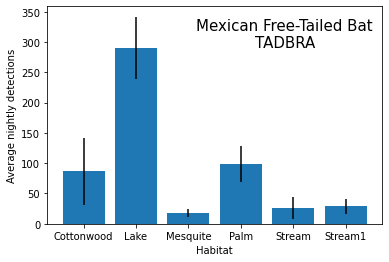

In [16]:
plt.bar(mean_df.index, mean_df.TADBRA, yerr=sdiv_df.TADBRA)
plt.text(5.5, 340, 'Mexican Free-Tailed Bat\nTADBRA            ', fontsize = 15, horizontalalignment='right', verticalalignment='top')
plt.xlabel('Habitat')
plt.ylabel('Average nightly detections')
plt.show()

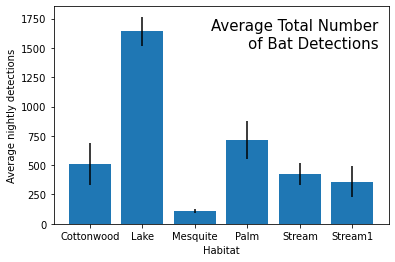

In [17]:
plt.bar(mean_df.index, mean_df.Tot_Bat_det, yerr=sdiv_df.Tot_Bat_det)
plt.text(5.5, 1750, 'Average Total Number\nof Bat Detections', fontsize = 15, horizontalalignment='right', verticalalignment='top')
plt.xlabel('Habitat')
plt.ylabel('Average nightly detections')
plt.show()

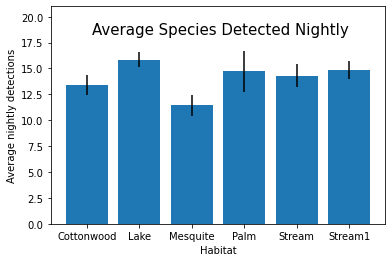

In [18]:
plt.bar(mean_df.index, mean_df['Total_Species'], yerr=sdiv_df['Total_Species'])
plt.text(5, 19.5, 'Average Species Detected Nightly', fontsize = 15, horizontalalignment='right', verticalalignment='top')
plt.xlabel('Habitat')
plt.ylabel('Average nightly detections')
plt.ylim(0, 21)
plt.show()

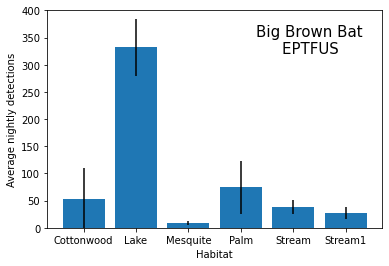

In [19]:
plt.bar(mean_df.index, mean_df.EPTFUS, yerr=sdiv_df.EPTFUS)
plt.text(5.5, 375, 'Big Brown Bat  \nEPTFUS       ', fontsize = 15, horizontalalignment='right', verticalalignment='top')
plt.xlabel('Habitat')
plt.ylabel('Average nightly detections')
plt.ylim(0, 400)
plt.show()

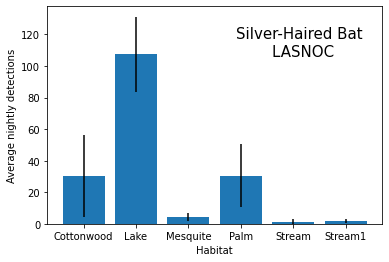

In [20]:
plt.bar(mean_df.index, mean_df.LASNOC, yerr=sdiv_df.LASNOC)
plt.text(5.5, 125, 'Silver-Haired Bat  \nLASNOC        ', fontsize = 15, horizontalalignment='right', verticalalignment='top')
plt.xlabel('Habitat')
plt.ylabel('Average nightly detections')
plt.show()

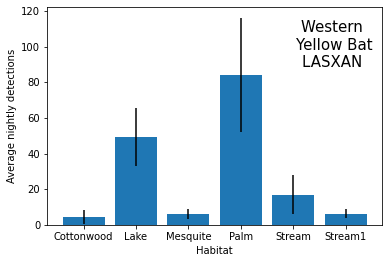

In [21]:
plt.bar(mean_df.index, mean_df.LASXAN, yerr=sdiv_df.LASXAN)
plt.text(5.5, 115, 'Western  \nYellow Bat\nLASXAN  ', fontsize = 15, horizontalalignment='right', verticalalignment='top')
plt.xlabel('Habitat')
plt.ylabel('Average nightly detections')
plt.show()

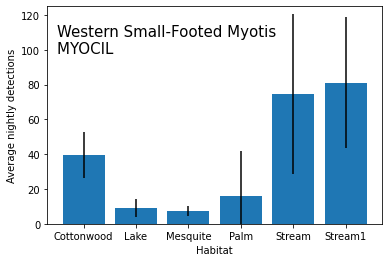

In [22]:
plt.bar(mean_df.index, mean_df.MYOCIL, yerr=sdiv_df.MYOCIL)
plt.text(-0.5, 115, 'Western Small-Footed Myotis \nMYOCIL  ', fontsize = 15, horizontalalignment='left', verticalalignment='top')
plt.xlabel('Habitat')
plt.ylabel('Average nightly detections')
plt.ylim(0, 125)
plt.show()

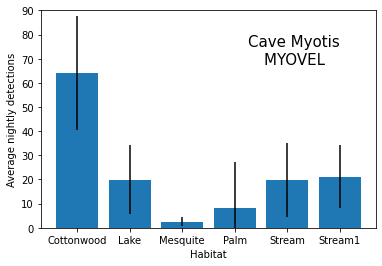

In [23]:
plt.bar(mean_df.index, mean_df.MYOVEL, yerr=sdiv_df.MYOVEL)
plt.text(5, 80, 'Cave Myotis\nMYOVEL   ', fontsize = 15, horizontalalignment='right', verticalalignment='top')
plt.xlabel('Habitat')
plt.ylabel('Average nightly detections')
plt.ylim(0, 90)
plt.show()

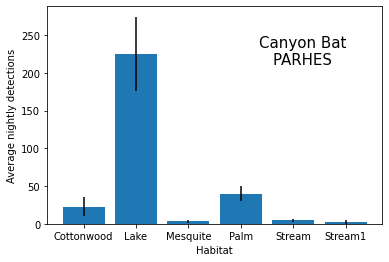

In [24]:
plt.bar(mean_df.index, mean_df.PARHES, yerr=sdiv_df.PARHES)
plt.text(5, 250, 'Canyon Bat\nPARHES   ', fontsize = 15, horizontalalignment='right', verticalalignment='top')
plt.xlabel('Habitat')
plt.ylabel('Average nightly detections')
plt.show()

# Graphing On Single Chart

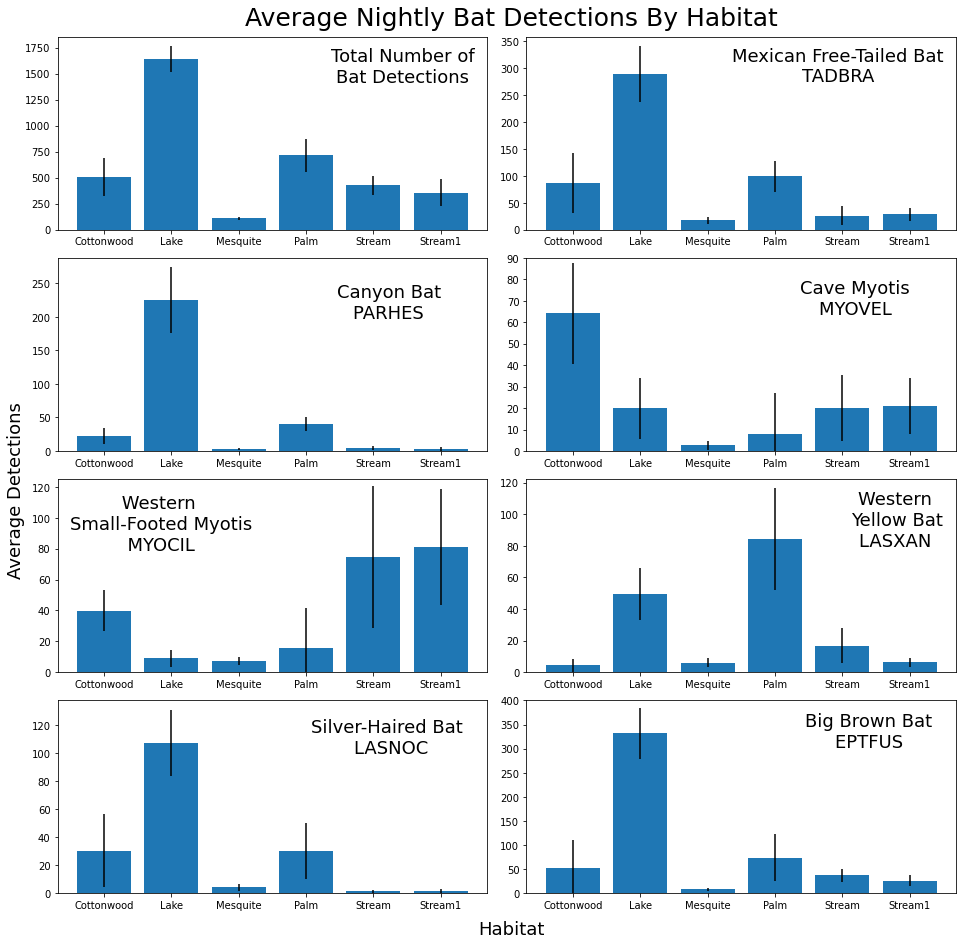

In [25]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows = 4, ncols = 2, figsize=(14,14))
fig.suptitle('Average Nightly Bat Detections By Habitat', fontsize=25, x = 0.54)
fig.tight_layout()
fig.subplots_adjust(top=0.95, bottom = 0.1, left = 0.09)

ax1.bar(mean_df.index, mean_df.Tot_Bat_det, yerr=sdiv_df.Tot_Bat_det)
ax1.text(5.5, 1750, 'Total Number of\nBat Detections ', fontsize = 18, horizontalalignment='right', verticalalignment='top')

ax2.bar(mean_df.index, mean_df.TADBRA, yerr=sdiv_df.TADBRA)
ax2.text(5.5, 340, 'Mexican Free-Tailed Bat\nTADBRA            ', fontsize = 18, horizontalalignment='right', verticalalignment='top')

ax3.bar(mean_df.index, mean_df.PARHES, yerr=sdiv_df.PARHES)
ax3.text(5, 250, 'Canyon Bat\nPARHES   ', fontsize = 18, horizontalalignment='right', verticalalignment='top')

ax4.bar(mean_df.index, mean_df.MYOVEL, yerr=sdiv_df.MYOVEL)
ax4.text(5, 80, 'Cave Myotis\nMYOVEL   ', fontsize = 18, horizontalalignment='right', verticalalignment='top')
ax4.set_ylim(0, 90)

ax5.bar(mean_df.index, mean_df.MYOCIL, yerr=sdiv_df.MYOCIL)
ax5.text(-0.5, 115, '         Western\nSmall-Footed Myotis\n          MYOCIL  ', fontsize = 18, horizontalalignment='left', verticalalignment='top')
ax5.set_ylim(0, 125)

ax6.bar(mean_df.index, mean_df.LASXAN, yerr=sdiv_df.LASXAN)
ax6.text(5.5, 115, 'Western  \nYellow Bat\nLASXAN  ', fontsize = 18, horizontalalignment='right', verticalalignment='top')

ax7.bar(mean_df.index, mean_df.LASNOC, yerr=sdiv_df.LASNOC)
ax7.text(5.5, 125, 'Silver-Haired Bat  \nLASNOC        ', fontsize = 18, horizontalalignment='right', verticalalignment='top')

ax8.bar(mean_df.index, mean_df.EPTFUS, yerr=sdiv_df.EPTFUS)
ax8.text(5.5, 375, 'Big Brown Bat  \nEPTFUS       ', fontsize = 18, horizontalalignment='right', verticalalignment='top')
ax8.set_ylim(0, 400)

fig.text(0.54, 0.06, 'Habitat', ha='center', fontsize=18)
fig.text(0.04, 0.5, 'Average Detections', va='center', rotation='vertical', fontsize = 18)
plt.show()

# Hypothesis Testing

In [26]:
#Load package for testing distribution of data
from scipy.stats import shapiro

In [27]:
#Testing normality of data for each feature
hab_SWtest = []
species = []
habitat = []
for i in df['Habitat'].unique():
    for s in ['EPTFUS', 'LASNOC', 'LASXAN', 'MYOCIL', 'MYOVEL', 'PARHES', 'TADBRA', 'Tot_Bat_det', 'Total_Species']:
        habitat.append(i)
        species.append(s)
        hab_SWtest.append(shapiro(df[s]))
hab_SWtest_df = pd.DataFrame({'Species' : species, 'Habitat' : habitat, 'SW test' : hab_SWtest})

In [28]:
#Extracting p-value for each s-w test for normality
pval = pd.DataFrame([x[1] for x in hab_SWtest_df['SW test']])
len(pval)

54

In [29]:
#Determine is any of the species have a normal data distribution
print('Number of non-normal distributions:', (pval < 0.05).sum())
print('Number of normal distributions:', (pval > 0.05).sum())

Number of non-normal distributions: 0    54
dtype: int64
Number of normal distributions: 0    0
dtype: int64


None of the data is normally distributed so non-parametric hypothesis testing should be carried out.

## KW Test

In [30]:
#Loading packages to carry out non-parametric hypothesis testing and posthoc tests
from scipy import stats
import scikit_posthocs as sp

In [31]:
#Carrying out KW test to compare each species across habitats/sample sites.
#This is done for the seven most common species as well as total species and total detections.
kwtest = []
kwspecies = []

for i in ['EPTFUS', 'LASNOC', 'LASXAN', 'MYOCIL', 'MYOVEL', 'PARHES', 'TADBRA', 'Tot_Bat_det', 'Total_Species']:
    kwtest.append(stats.kruskal(df[df['Habitat'] == 'Stream'][i], 
                                df[df['Habitat'] == 'Cottonwood'][i], 
                                df[df['Habitat'] == 'Stream1'][i], 
                                df[df['Habitat'] == 'Mesquite'][i], 
                                df[df['Habitat'] == 'Lake'][i], 
                                df[df['Habitat'] == 'Palm'][i]))
    kwspecies.append(i)
print(pd.DataFrame({'Species' : kwspecies, 'Score' : [x[0] for x in kwtest], 'p-value' : [x[1] for x in kwtest]}))

         Species      Score   p-value
0         EPTFUS  30.105762  0.000014
1         LASNOC  35.303649  0.000001
2         LASXAN  34.534156  0.000002
3         MYOCIL  28.611371  0.000028
4         MYOVEL  27.119784  0.000054
5         PARHES  34.471538  0.000002
6         TADBRA  33.583990  0.000003
7    Tot_Bat_det  33.725202  0.000003
8  Total_Species  24.569956  0.000169


It was determined that there were statistically significant differences for individual species, total detections, and total species overall across all habitats.

### Pair-wise comparison tests

In [32]:
#Pairwise comparison between habitats for 7 most common species, total detections and total species.
spp = []
post_hoc = []

for i in ['EPTFUS', 'LASNOC', 'LASXAN', 'MYOCIL', 'MYOVEL', 'PARHES', 'TADBRA', 'Tot_Bat_det', 'Total_Species']:
    post_hoc.append(sp.posthoc_conover(df, val_col=i, group_col='Habitat', p_adjust = 'holm'))
    spp.append(i)
post = pd.DataFrame({'Species' : spp, 'Post Hoc Test' : post_hoc})

In [33]:
print('EPTFUS')
post_hoc[0]

EPTFUS


,Cottonwood,Lake,Mesquite,Palm,Stream,Stream1
Cottonwood,1.000000,7.454399e-05,1.195914e-03,0.368658,0.757407,0.757407
Lake,0.000075,1.000000e+00,3.005554e-10,0.011697,0.000456,0.000006
Mesquite,0.001196,3.005554e-10,1.000000e+00,0.000006,0.000204,0.012063
Palm,0.368658,1.169735e-02,6.246585e-06,1.000000,0.727419,0.057972
Stream,0.757407,4.563027e-04,2.035934e-04,0.727419,1.000000,0.524500
Stream1,0.757407,5.605044e-06,1.206317e-02,0.057972,0.524500,1.000000


In [34]:
print('LASNOC')
post_hoc[1]

LASNOC


,Cottonwood,Lake,Mesquite,Palm,Stream,Stream1
Cottonwood,1.000000e+00,1.846179e-03,8.568518e-05,1.000000e+00,5.515113e-08,1.111812e-07
Lake,1.846179e-03,1.000000e+00,1.053970e-09,2.483761e-03,1.453711e-12,2.877538e-12
Mesquite,8.568518e-05,1.053970e-09,1.000000e+00,5.901457e-05,5.909029e-02,9.028923e-02
Palm,1.000000e+00,2.483761e-03,5.901457e-05,1.000000e+00,3.693503e-08,7.545462e-08
Stream,5.515113e-08,1.453711e-12,5.909029e-02,3.693503e-08,1.000000e+00,1.000000e+00
Stream1,1.111812e-07,2.877538e-12,9.028923e-02,7.545462e-08,1.000000e+00,1.000000e+00


In [35]:
print('LASXAN')
post_hoc[2]

LASXAN


,Cottonwood,Lake,Mesquite,Palm,Stream,Stream1
Cottonwood,1.000000e+00,6.490870e-09,7.325749e-01,2.840255e-11,0.000013,7.325749e-01
Lake,6.490870e-09,1.000000e+00,8.976133e-08,1.871217e-01,0.063144,1.761880e-07
Mesquite,7.325749e-01,8.976133e-08,1.000000e+00,3.156540e-10,0.000197,7.983507e-01
Palm,2.840255e-11,1.871217e-01,3.156540e-10,1.000000e+00,0.000275,5.949367e-10
Stream,1.287860e-05,6.314403e-02,1.965351e-04,2.748085e-04,1.000000,3.215030e-04
Stream1,7.325749e-01,1.761880e-07,7.983507e-01,5.949367e-10,0.000322,1.000000e+00


In [36]:
print('MYOCIL')
post_hoc[3]

MYOCIL


,Cottonwood,Lake,Mesquite,Palm,Stream,Stream1
Cottonwood,1.000000,0.003976,0.002099,0.005049,0.615019,0.246783
Lake,0.003976,1.000000,1.000000,1.000000,0.000047,0.000011
Mesquite,0.002099,1.000000,1.000000,1.000000,0.000023,0.000006
Palm,0.005049,1.000000,1.000000,1.000000,0.000064,0.000016
Stream,0.615019,0.000047,0.000023,0.000064,1.000000,1.000000
Stream1,0.246783,0.000011,0.000006,0.000016,1.000000,1.000000


In [37]:
print('MYOVEL')
post_hoc[4]

MYOVEL


,Cottonwood,Lake,Mesquite,Palm,Stream,Stream1
Cottonwood,1.000000e+00,0.012576,3.701413e-07,6.529474e-07,0.012576,0.012576
Lake,1.257578e-02,1.000000,7.657527e-03,1.049776e-02,1.000000,1.000000
Mesquite,3.701413e-07,0.007658,1.000000e+00,1.000000e+00,0.007502,0.007658
Palm,6.529474e-07,0.010498,1.000000e+00,1.000000e+00,0.010498,0.010498
Stream,1.257578e-02,1.000000,7.502184e-03,1.049776e-02,1.000000,1.000000
Stream1,1.257578e-02,1.000000,7.657527e-03,1.049776e-02,1.000000,1.000000


In [38]:
print('PARHES')
post_hoc[5]

PARHES


,Cottonwood,Lake,Mesquite,Palm,Stream,Stream1
Cottonwood,1.000000,1.245669e-04,6.499557e-05,1.806996e-01,1.968371e-03,1.019406e-05
Lake,0.000125,1.000000e+00,5.906956e-11,3.420799e-02,1.579773e-09,1.188641e-11
Mesquite,0.000065,5.906956e-11,1.000000e+00,1.574387e-07,4.535444e-01,5.259116e-01
Palm,0.180700,3.420799e-02,1.574387e-07,1.000000e+00,6.029103e-06,2.572147e-08
Stream,0.001968,1.579773e-09,4.535444e-01,6.029103e-06,1.000000e+00,2.088031e-01
Stream1,0.000010,1.188641e-11,5.259116e-01,2.572147e-08,2.088031e-01,1.000000e+00


In [39]:
print('TADBRA')
post_hoc[6]

TADBRA


,Cottonwood,Lake,Mesquite,Palm,Stream,Stream1
Cottonwood,1.000000,9.463682e-04,4.904689e-06,6.345005e-01,1.774464e-04,1.765825e-03
Lake,0.000946,1.000000e+00,3.096074e-11,1.561511e-02,8.966068e-10,9.657566e-09
Mesquite,0.000005,3.096074e-11,1.000000e+00,1.864959e-07,6.345005e-01,1.581558e-01
Palm,0.634501,1.561511e-02,1.864959e-07,1.000000e+00,7.473143e-06,9.588924e-05
Stream,0.000177,8.966068e-10,6.345005e-01,7.473143e-06,1.000000e+00,6.345005e-01
Stream1,0.001766,9.657566e-09,1.581558e-01,9.588924e-05,6.345005e-01,1.000000e+00


In [40]:
print('Tot_Bat_det')
post_hoc[7]

Tot_Bat_det


,Cottonwood,Lake,Mesquite,Palm,Stream,Stream1
Cottonwood,1.000000,1.423255e-05,5.513341e-06,5.155316e-02,4.315293e-01,8.634355e-02
Lake,0.000014,1.000000e+00,7.839783e-13,1.639162e-02,7.559355e-07,1.914381e-08
Mesquite,0.000006,7.839783e-13,1.000000e+00,2.928055e-09,1.031180e-04,3.469479e-03
Palm,0.051553,1.639162e-02,2.928055e-09,1.000000e+00,5.172722e-03,1.657242e-04
Stream,0.431529,7.559355e-07,1.031180e-04,5.172722e-03,1.000000e+00,4.315293e-01
Stream1,0.086344,1.914381e-08,3.469479e-03,1.657242e-04,4.315293e-01,1.000000e+00


In [41]:
print('Total_Species')
post_hoc[8]

Total_Species


,Cottonwood,Lake,Mesquite,Palm,Stream,Stream1
Cottonwood,1.000000,0.001072,0.200711,0.150742,0.612425,0.150742
Lake,0.001072,1.000000,0.000001,0.352922,0.055312,0.352922
Mesquite,0.200711,0.000001,1.000000,0.000432,0.007052,0.000401
Palm,0.150742,0.352922,0.000432,1.000000,0.902816,0.961035
Stream,0.612425,0.055312,0.007052,0.902816,1.000000,0.902816
Stream1,0.150742,0.352922,0.000401,0.961035,0.902816,1.000000


# MANOVA

In [42]:
#Install package for manova
from statsmodels.multivariate.manova import MANOVA

In [43]:
#Overall manova for seven most common species, total detections and total species.
#Being data is not normally distributed this is not an appropriate test, but is carried out anyway for curiosity sake.
manova = MANOVA.from_formula('EPTFUS + LASNOC + LASXAN + MYOCIL + MYOVEL + PARHES + TADBRA + Tot_Bat_det + Total_Species ~ Habitat', data=df)
print(manova.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
         Intercept         Value  Num DF  Den DF F Value  Pr > F
----------------------------------------------------------------
            Wilks' lambda  0.0232 9.0000 28.0000 130.8211 0.0000
           Pillai's trace  0.9768 9.0000 28.0000 130.8211 0.0000
   Hotelling-Lawley trace 42.0496 9.0000 28.0000 130.8211 0.0000
      Roy's greatest root 42.0496 9.0000 28.0000 130.8211 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        Habitat          Value   Num DF  Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0002 45.0000 128.3536  16.9630 0.0000
         Pillai's trace  3.3929 45.0000 160.0

A statistically significant difference is found across all habitats for the bat communities.

# Non-parametric MANOVA

In [44]:
#Converting data to rank due to non-normal distribution
rank_df = df[['EPTFUS', 'LASNOC', 'LASXAN', 'MYOCIL', 'MYOVEL', 'PARHES', 'TADBRA', 'Tot_Bat_det']].rank()
rank_df['Habitat'] = df['Habitat']
rank_df['Total_Species'] = df['Total_Species']

In [45]:
rank_df.head()

,EPTFUS,LASNOC,LASXAN,MYOCIL,MYOVEL,PARHES,TADBRA,Tot_Bat_det,Habitat,Total_Species
0,12.0,16.0,20.5,42.0,26.0,10.0,25.0,26.0,Stream,15
1,23.0,13.5,25.5,28.5,17.0,3.5,3.0,10.0,Stream,16
2,24.5,13.5,31.0,39.0,18.5,16.5,19.0,25.0,Stream,14
3,30.0,1.5,24.0,22.0,22.5,10.0,15.5,16.0,Stream,13
4,28.0,7.0,27.0,27.0,18.5,16.5,5.0,15.0,Stream,13


In [46]:
#Carrying out rank manova for seven most common species, total detections and total species.
rank_manova = MANOVA.from_formula('EPTFUS + LASNOC + LASXAN + MYOCIL + MYOVEL + PARHES + TADBRA + Tot_Bat_det +Total_Species ~ Habitat', data=rank_df)
print(rank_manova.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
        Intercept         Value  Num DF  Den DF F Value  Pr > F
---------------------------------------------------------------
           Wilks' lambda  0.0159 9.0000 28.0000 192.0709 0.0000
          Pillai's trace  0.9841 9.0000 28.0000 192.0709 0.0000
  Hotelling-Lawley trace 61.7371 9.0000 28.0000 192.0709 0.0000
     Roy's greatest root 61.7371 9.0000 28.0000 192.0709 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
        Habitat          Value   Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0007 45.0000 128.3536 11.6221 0.0000
         Pillai's trace  3.0247 45.0000 160.0000  5.4443 0.

A statistically significant difference is found across all habitats for the bat communities.

## Rank-MANOVA Pairwise Comparison

In [47]:
#Create list of all habitats sampled
hab_list = list(rank_df['Habitat'].unique())
hab_list

['Stream', 'Cottonwood', 'Stream1', 'Mesquite', 'Lake', 'Palm']

In [48]:
#Dataframe where Stream and Stream1 sampling sites can be compared.
rank_df[(rank_df['Habitat'] == 'Stream1') | (rank_df['Habitat'] == 'Stream')]

,EPTFUS,LASNOC,LASXAN,MYOCIL,MYOVEL,PARHES,TADBRA,Tot_Bat_det,Habitat,Total_Species
0,12.0,16.0,20.5,42.0,26.0,10.0,25.0,26.0,Stream,15
1,23.0,13.5,25.5,28.5,17.0,3.5,3.0,10.0,Stream,16
2,24.5,13.5,31.0,39.0,18.5,16.5,19.0,25.0,Stream,14
3,30.0,1.5,24.0,22.0,22.5,10.0,15.5,16.0,Stream,13
4,28.0,7.0,27.0,27.0,18.5,16.5,5.0,15.0,Stream,13
5,20.5,7.0,22.5,34.0,32.0,22.0,13.0,20.0,Stream,14
6,18.0,1.5,25.5,36.0,35.5,20.5,2.0,21.0,Stream,15
14,27.0,7.0,3.5,40.0,27.0,1.5,12.0,22.0,Stream1,15
15,22.0,17.0,12.5,41.0,33.0,13.5,22.0,27.0,Stream1,15
16,17.0,7.0,6.5,37.5,28.5,13.5,20.0,17.0,Stream1,16


In [49]:
#Creating function so different sites can be compared.
def pwc_manova(habitat_1, habitat_2):
    rank_manova = MANOVA.from_formula('EPTFUS + LASNOC + LASXAN + MYOCIL + MYOVEL + PARHES + TADBRA + Tot_Bat_det + Total_Species ~ Habitat', 
                                  data=rank_df[(rank_df['Habitat'] == habitat_1) | (rank_df['Habitat'] == habitat_2)])
    print(habitat_1, ' to', habitat_2, ' Comparison')
    print(rank_manova.mv_test())

In [50]:
pwc_manova('Stream', 'Stream1')

Stream  to Stream1  Comparison
                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value   Num DF Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0015 9.0000 4.0000 299.5780 0.0000
         Pillai's trace   0.9985 9.0000 4.0000 299.5780 0.0000
 Hotelling-Lawley trace 674.0505 9.0000 4.0000 299.5780 0.0000
    Roy's greatest root 674.0505 9.0000 4.0000 299.5780 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           Habitat         Value  Num DF Den DF F Value Pr > F
--------------------------------------------------------------
             Wilks' lambda 0.1263 9.0000 4.0000  3.0733 0.1459
            Pillai's trace 0.8737 9.0000 4.

C:\Users\matta\anaconda3\lib\site-packages\statsmodels\multivariate\multivariate_ols.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)


In [51]:
pwc_manova('Stream', 'Cottonwood')

Stream  to Cottonwood  Comparison
                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value   Num DF Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0017 9.0000 4.0000 259.5890 0.0000
         Pillai's trace   0.9983 9.0000 4.0000 259.5890 0.0000
 Hotelling-Lawley trace 584.0753 9.0000 4.0000 259.5890 0.0000
    Roy's greatest root 584.0753 9.0000 4.0000 259.5890 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
          Habitat          Value  Num DF Den DF F Value Pr > F
--------------------------------------------------------------
            Wilks' lambda  0.0121 9.0000 4.0000 36.3606 0.0018
           Pillai's trace  0.9879 9.0000

C:\Users\matta\anaconda3\lib\site-packages\statsmodels\multivariate\multivariate_ols.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)


In [52]:
pwc_manova('Stream', 'Mesquite')

Stream  to Mesquite  Comparison
                  Multivariate linear model
                                                              
--------------------------------------------------------------
       Intercept         Value   Num DF Den DF F Value  Pr > F
--------------------------------------------------------------
          Wilks' lambda   0.0014 9.0000 4.0000 323.7363 0.0000
         Pillai's trace   0.9986 9.0000 4.0000 323.7363 0.0000
 Hotelling-Lawley trace 728.4067 9.0000 4.0000 323.7363 0.0000
    Roy's greatest root 728.4067 9.0000 4.0000 323.7363 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
         Habitat          Value   Num DF Den DF F Value Pr > F
--------------------------------------------------------------
           Wilks' lambda   0.0063 9.0000 4.0000 69.8609 0.0005
          Pillai's trace   0.9937 9.0000 4

C:\Users\matta\anaconda3\lib\site-packages\statsmodels\multivariate\multivariate_ols.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)


In [53]:
pwc_manova('Stream', 'Lake')

Stream  to Lake  Comparison
                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept          Value   Num DF Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda    0.0004 9.0000 4.0000 1005.5624 0.0000
         Pillai's trace    0.9996 9.0000 4.0000 1005.5624 0.0000
 Hotelling-Lawley trace 2262.5154 9.0000 4.0000 1005.5624 0.0000
    Roy's greatest root 2262.5154 9.0000 4.0000 1005.5624 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          Habitat          Value   Num DF Den DF F Value  Pr > F
----------------------------------------------------------------
            Wilks' lambda   0.0042 9.0000 4.0000 104.4321 0.0002
           Pillai

C:\Users\matta\anaconda3\lib\site-packages\statsmodels\multivariate\multivariate_ols.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)


In [54]:
pwc_manova('Stream', 'Palm')

Stream  to Palm  Comparison
                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept          Value   Num DF Den DF F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda    0.0009 9.0000 4.0000 473.9104 0.0000
         Pillai's trace    0.9991 9.0000 4.0000 473.9104 0.0000
 Hotelling-Lawley trace 1066.2983 9.0000 4.0000 473.9104 0.0000
    Roy's greatest root 1066.2983 9.0000 4.0000 473.9104 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
          Habitat          Value   Num DF Den DF F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda   0.0077 9.0000 4.0000 57.3194 0.0007
           Pillai's trace   0.9

C:\Users\matta\anaconda3\lib\site-packages\statsmodels\multivariate\multivariate_ols.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)


In [55]:
pwc_manova('Cottonwood', 'Mesquite')

Cottonwood  to Mesquite  Comparison
                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept          Value   Num DF Den DF F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda    0.0008 9.0000 4.0000 542.2553 0.0000
         Pillai's trace    0.9992 9.0000 4.0000 542.2553 0.0000
 Hotelling-Lawley trace 1220.0744 9.0000 4.0000 542.2553 0.0000
    Roy's greatest root 1220.0744 9.0000 4.0000 542.2553 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
           Habitat          Value  Num DF Den DF F Value Pr > F
---------------------------------------------------------------
             Wilks' lambda  0.0176 9.0000 4.0000 24.8400 0.0037
            Pillai's tr

C:\Users\matta\anaconda3\lib\site-packages\statsmodels\multivariate\multivariate_ols.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)


In [56]:
pwc_manova('Cottonwood', 'Lake')

Cottonwood  to Lake  Comparison
                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept          Value   Num DF Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda    0.0003 9.0000 4.0000 1649.2857 0.0000
         Pillai's trace    0.9997 9.0000 4.0000 1649.2857 0.0000
 Hotelling-Lawley trace 3710.8929 9.0000 4.0000 1649.2857 0.0000
    Roy's greatest root 3710.8929 9.0000 4.0000 1649.2857 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            Habitat          Value  Num DF Den DF F Value Pr > F
----------------------------------------------------------------
              Wilks' lambda  0.0150 9.0000 4.0000 29.1230 0.0027
             

C:\Users\matta\anaconda3\lib\site-packages\statsmodels\multivariate\multivariate_ols.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)


In [57]:
pwc_manova('Cottonwood', 'Palm')

Cottonwood  to Palm  Comparison
                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept          Value   Num DF Den DF F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda    0.0009 9.0000 4.0000 471.4398 0.0000
         Pillai's trace    0.9991 9.0000 4.0000 471.4398 0.0000
 Hotelling-Lawley trace 1060.7397 9.0000 4.0000 471.4398 0.0000
    Roy's greatest root 1060.7397 9.0000 4.0000 471.4398 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
          Habitat          Value   Num DF Den DF F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda   0.0095 9.0000 4.0000 46.3290 0.0011
           Pillai's trace  

C:\Users\matta\anaconda3\lib\site-packages\statsmodels\multivariate\multivariate_ols.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)


In [58]:
pwc_manova('Mesquite', 'Lake')

Mesquite  to Lake  Comparison
                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept          Value   Num DF Den DF F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda    0.0007 9.0000 4.0000 594.8837 0.0000
         Pillai's trace    0.9993 9.0000 4.0000 594.8837 0.0000
 Hotelling-Lawley trace 1338.4883 9.0000 4.0000 594.8837 0.0000
    Roy's greatest root 1338.4883 9.0000 4.0000 594.8837 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
         Habitat          Value   Num DF Den DF F Value  Pr > F
---------------------------------------------------------------
           Wilks' lambda   0.0035 9.0000 4.0000 124.8277 0.0002
          Pillai's trace   0.

C:\Users\matta\anaconda3\lib\site-packages\statsmodels\multivariate\multivariate_ols.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)


In [59]:
pwc_manova('Mesquite', 'Palm')

Mesquite  to Palm  Comparison
                  Multivariate linear model
                                                             
-------------------------------------------------------------
       Intercept         Value   Num DF Den DF F Value Pr > F
-------------------------------------------------------------
          Wilks' lambda   0.0062 9.0000 4.0000 70.6859 0.0005
         Pillai's trace   0.9938 9.0000 4.0000 70.6859 0.0005
 Hotelling-Lawley trace 159.0433 9.0000 4.0000 70.6859 0.0005
    Roy's greatest root 159.0433 9.0000 4.0000 70.6859 0.0005
-------------------------------------------------------------
                                                             
-------------------------------------------------------------
         Habitat          Value  Num DF Den DF F Value Pr > F
-------------------------------------------------------------
           Wilks' lambda  0.0181 9.0000 4.0000 24.1206 0.0039
          Pillai's trace  0.9819 9.0000 4.0000 24.1206 0.0

C:\Users\matta\anaconda3\lib\site-packages\statsmodels\multivariate\multivariate_ols.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)


In [60]:
pwc_manova('Lake', 'Palm')

Lake  to Palm  Comparison
                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept          Value   Num DF Den DF  F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda    0.0002 9.0000 4.0000 2388.7412 0.0000
         Pillai's trace    0.9998 9.0000 4.0000 2388.7412 0.0000
 Hotelling-Lawley trace 5374.6676 9.0000 4.0000 2388.7412 0.0000
    Roy's greatest root 5374.6676 9.0000 4.0000 2388.7412 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
          Habitat          Value   Num DF Den DF F Value  Pr > F
----------------------------------------------------------------
            Wilks' lambda   0.0026 9.0000 4.0000 170.4548 0.0001
           Pillai's

C:\Users\matta\anaconda3\lib\site-packages\statsmodels\multivariate\multivariate_ols.py:218: RuntimeWarning: divide by zero encountered in double_scalars
  b = (p + 2*n) * (q + 2*n) / 2 / (2*n + 1) / (n - 1)


There are statistically significant differences between all habitat types for the bat communities.  Only Stream1 and Stream were found to not have statistically significant differences between each other.  This was to be expected being they are the same habitat type sampled during different weeks during the test period.

# Conclusion

* 20 species were identified across all habitats

* The cottonwood-willow pond shore (Lake) had overall most bat detections with over 1500 average nightly detections, which was significantly greater than the habitat with the second most detections. The habitat with the second most detections was the willow-palm-cottonwood-mesquite habitat (Palm) with approxymately 750 detections per night.

* Mesquite bosque (Mesquite) had the least number of total nightly detections with less than 100 per night.

* The seven most common species were the Mexican Free-Tailed Bat (TADBRA), Big Brown Bat (EPTFUS), Silver-Haired Bat (LASNOC), Western Yellow Bat (LASXAN), Western Small-footed Myotis (MYOCIL), Cave Myotis (MYOVEL), and Canyon Bat (PARHES).  Of these species the Mexican Free-Tailed bat was the most abundant.

* Each species was found to have a different habitat preference.

* Each habitat had a unique bat community.